In [249]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.ensemble import RandomForestRegressor
import joblib

import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
import math
import requests

In [250]:
df = pd.read_csv("RV2_UPP_IIR_SIPIA.csv")

df['Date'] = pd.to_datetime(df['Date'], utc=True)


df['Date_only'] = df['Date'].dt.date


daily_sum = df.groupby('Date_only').size()


print(daily_sum)


Date_only
2023-02-15     9
2023-02-16    48
2023-02-17    48
2023-02-18    48
2023-02-19    48
              ..
2023-12-07    24
2023-12-08    24
2023-12-09    24
2023-12-10    24
2023-12-11     9
Length: 211, dtype: int64


In [251]:
all_data = pd.read_csv("RV2_UPP_IIR_SIPIA.csv")
print(all_data.head())

                        Date  Latitude  Longitude  Altitude   NO2  PM2.5  O3  \
0  2023-02-22 09:15:00+00:00   46.5592  15.656191     270.0  35.0   23.0   0   
1  2023-02-22 09:35:00+00:00   46.5592  15.656191     270.0  35.0   23.0   0   
2  2023-02-16 17:15:00+00:00   46.5592  15.656191     270.0  86.0   51.0   0   
3  2023-02-16 17:35:00+00:00   46.5592  15.656191     270.0  86.0   51.0   0   
4  2023-10-24 10:35:00+00:00   46.5592  15.656191     270.0  68.0   19.0   0   

   PM10  
0  88.0  
1  88.0  
2  86.0  
3  86.0  
4  74.0  


In [252]:
all_data['Date'] = pd.to_datetime(all_data['Date'] )
all_data.sort_values(by='Date', inplace=True)
features = ['Latitude', 'Longitude', 'Altitude', 'NO2', 'PM2.5', 'O3', 'PM10']
all_data = all_data[['Date'] + features]

In [253]:
all_data.shape

(5625, 8)

In [254]:
missing_values = all_data.isnull().sum()

print(missing_values)

Date           0
Latitude       0
Longitude      0
Altitude       0
NO2          286
PM2.5        465
O3             0
PM10         466
dtype: int64


In [255]:
# Assuming 'all_data' is your DataFrame
measurements_by_day = all_data.groupby(all_data['Date'].dt.date).size()

# Print the result
print(measurements_by_day)


Date
2023-02-15     9
2023-02-16    48
2023-02-17    48
2023-02-18    48
2023-02-19    48
              ..
2023-12-07    24
2023-12-08    24
2023-12-09    24
2023-12-10    24
2023-12-11     9
Length: 211, dtype: int64


In [256]:
all_data = all_data.copy()
columns_with_missing_values = all_data.columns[all_data.isnull().any()]
print(columns_with_missing_values)
columns_with_missing_values = columns_with_missing_values.tolist()
missing_df = all_data[all_data.isnull().any(axis=1)]
complete_df = all_data.dropna()


Index(['NO2', 'PM2.5', 'PM10'], dtype='object')


In [257]:
def plot_histograms(df):
    numeric_columns = df.select_dtypes(include=['number'])
    numeric_columns.hist(bins=20, figsize=(20, 20))
    plt.title("Histograms of numerical columns")
    plt.show()

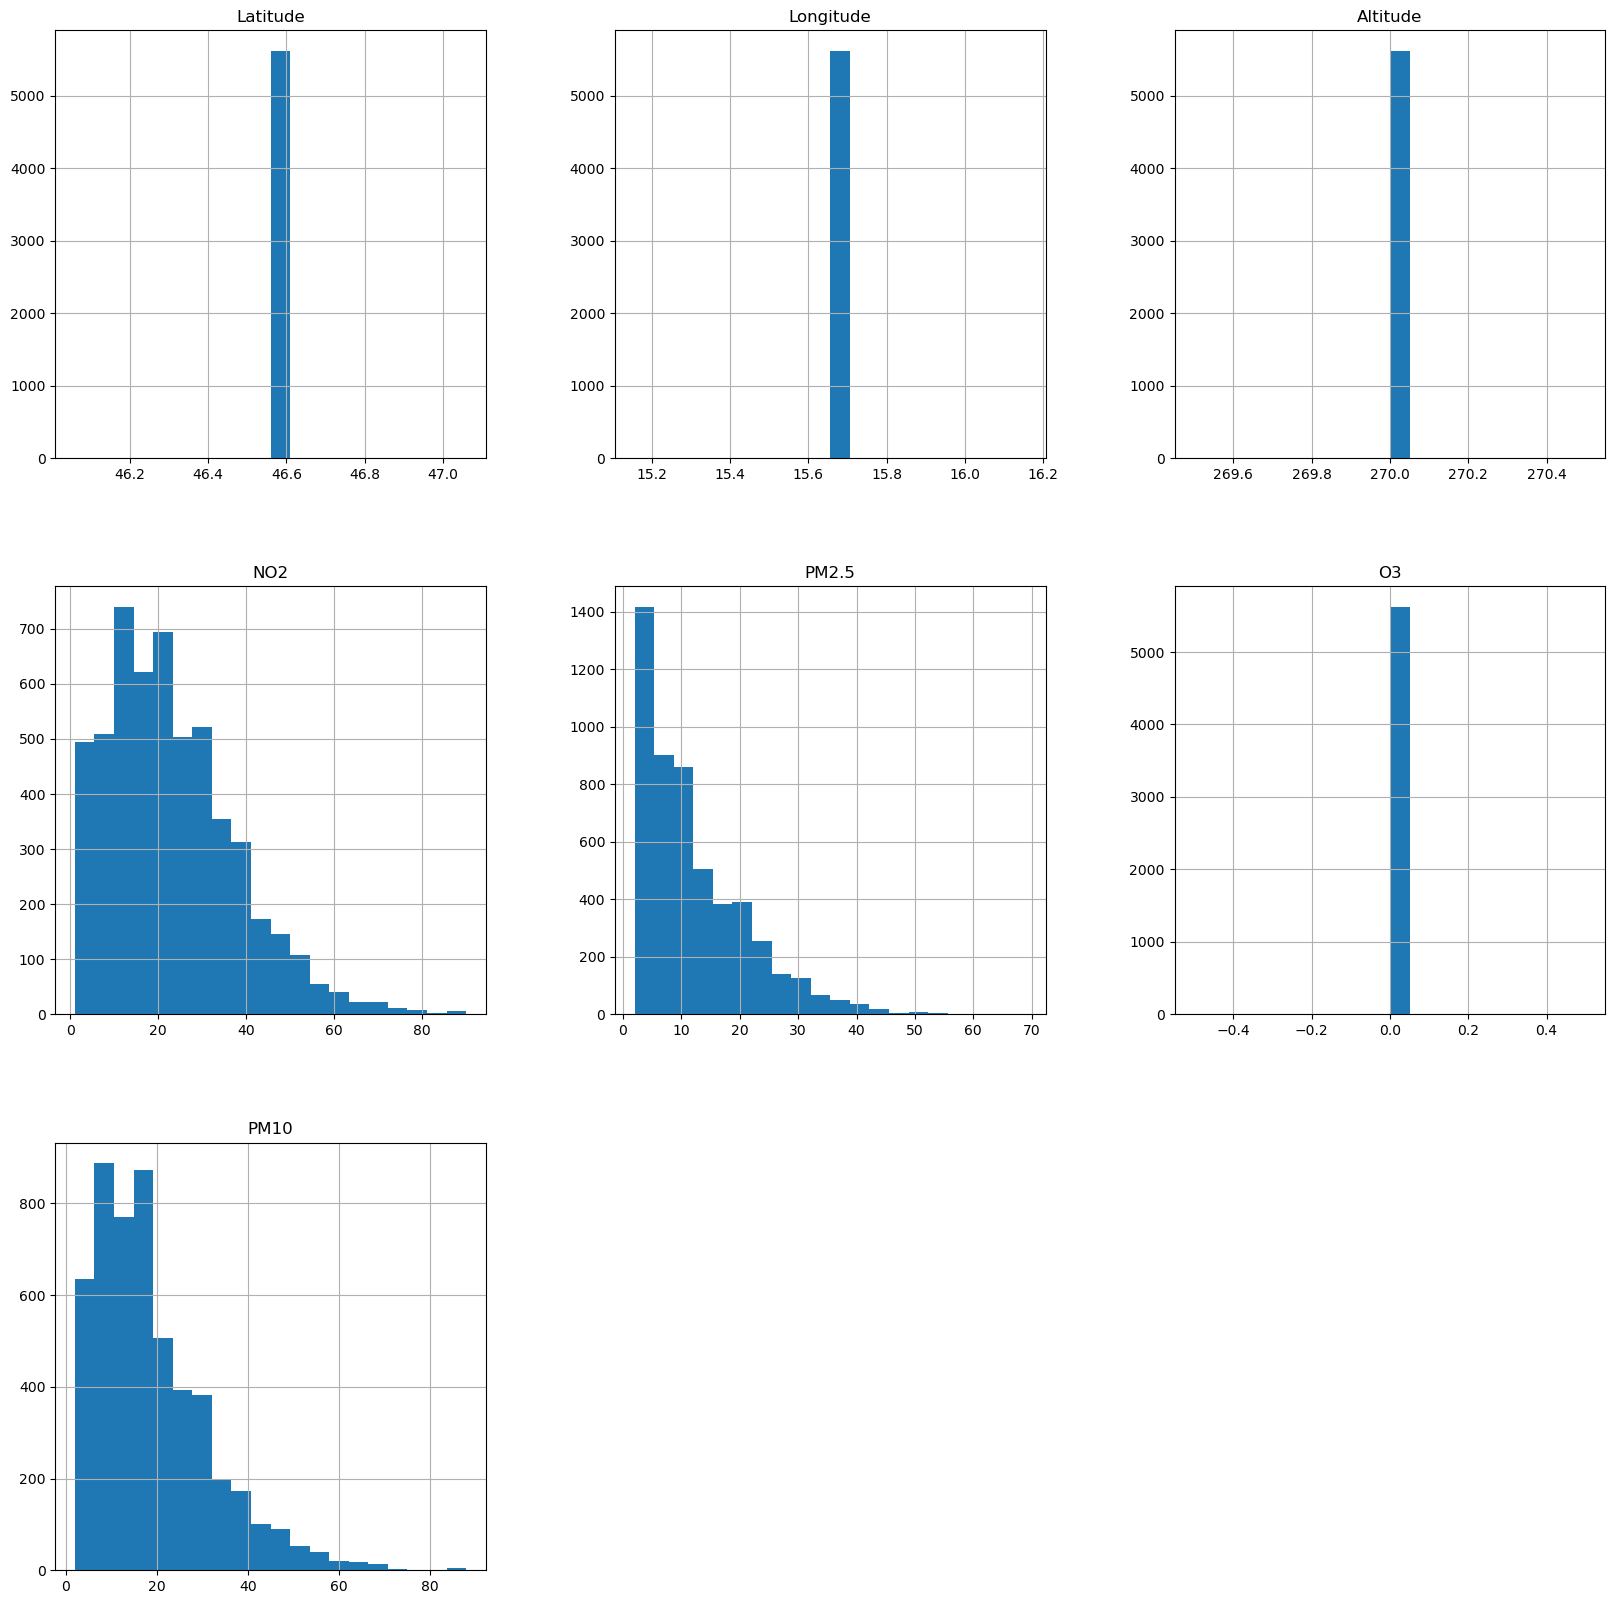

In [258]:
plot_histograms(all_data)

In [259]:
for column in columns_with_missing_values:
    X = complete_df[['Latitude', 'Longitude', 'Altitude', 'O3']]
    y = complete_df[column]
    
    model = RandomForestRegressor()
    model.fit(X, y)
    
    missing_X = missing_df[['Latitude', 'Longitude', 'Altitude', 'O3']]
    predictions = model.predict(missing_X)
    
    all_data.loc[missing_df.index, column] = predictions

missing_values = all_data.isnull().sum()

print(missing_values)

multivariate_series = np.array(all_data[features].values)

Date         0
Latitude     0
Longitude    0
Altitude     0
NO2          0
PM2.5        0
O3           0
PM10         0
dtype: int64


In [260]:
def plot_numeric_data(data):
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

    fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 5 * len(numerical_columns)))

    for i, column in enumerate(numerical_columns):
        sns.histplot(data[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
        axes[i].set_xlabel(column)

    plt.tight_layout()
    plt.show()

In [261]:
print(all_data["Latitude"].describe())
print(all_data["Latitude"].value_counts())
print(all_data["Longitude"].value_counts())
print(all_data["O3"].value_counts())
print(all_data["O3"])

count    5.625000e+03
mean     4.655920e+01
std      4.384438e-12
min      4.655920e+01
25%      4.655920e+01
50%      4.655920e+01
75%      4.655920e+01
max      4.655920e+01
Name: Latitude, dtype: float64
Latitude
46.5592    5625
Name: count, dtype: int64
Longitude
15.656191    5625
Name: count, dtype: int64
O3
0    5625
Name: count, dtype: int64
72      0
78      0
79      0
153     0
154     0
       ..
1880    0
2633    0
3067    0
3548    0
3844    0
Name: O3, Length: 5625, dtype: int64


# Nove Značilnice

In [262]:
#engeeniring features
all_data['NO2_PM2.5_Interact'] = all_data['NO2'] * all_data['PM2.5']


In [263]:
all_data['Day'] = all_data['Date'].dt.day
all_data['Month'] = all_data['Date'].dt.month
all_data['Hour'] = all_data['Date'].dt.hour
all_data['Day_of_Week'] = all_data['Date'].dt.dayofweek



In [264]:
def weather_data(lat, lon, start_date, end_date):
  start_date = start_date.strftime('%Y-%m-%d')
  end_date = end_date.strftime('%Y-%m-%d')

  base_url = "https://archive-api.open-meteo.com/v1/archive"
  params = {
    "timezone": "GMT",
    "latitude": lat,
    "longitude": lon,
    "start_date": start_date,
    "end_date": end_date,
    "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "rain", "weather_code", "wind_speed_10m", "soil_temperature_100_to_255cm"],
  }

  response = requests.get(base_url, params=params)
  data = response.json()

  print(data)

  df = pd.DataFrame(data['hourly'])
  df['Date'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M')
  df['Date'] = df['Date'].dt.tz_localize('UTC')
  df['Date_Hour'] = df['Date'].dt.floor('H')
  df.drop(columns=['time', 'Date'], inplace=True)

  print(df.head())

  print(df["Date_Hour"])


  return df

In [265]:
weather_df = weather_data(all_data['Latitude'].iloc[0], all_data['Longitude'].iloc[0], all_data['Date'].iloc[0], all_data['Date'].iloc[-1])

{'latitude': 46.572933, 'longitude': 15.771705, 'generationtime_ms': 1.6400814056396484, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 267.0, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'relative_humidity_2m': '%', 'precipitation': 'mm', 'rain': 'mm', 'weather_code': 'wmo code', 'wind_speed_10m': 'km/h', 'soil_temperature_100_to_255cm': '°C'}, 'hourly': {'time': ['2023-02-15T00:00', '2023-02-15T01:00', '2023-02-15T02:00', '2023-02-15T03:00', '2023-02-15T04:00', '2023-02-15T05:00', '2023-02-15T06:00', '2023-02-15T07:00', '2023-02-15T08:00', '2023-02-15T09:00', '2023-02-15T10:00', '2023-02-15T11:00', '2023-02-15T12:00', '2023-02-15T13:00', '2023-02-15T14:00', '2023-02-15T15:00', '2023-02-15T16:00', '2023-02-15T17:00', '2023-02-15T18:00', '2023-02-15T19:00', '2023-02-15T20:00', '2023-02-15T21:00', '2023-02-15T22:00', '2023-02-15T23:00', '2023-02-16T00:00', '2023-02-16T01:00', '2023-02-16T02:00', '2023-02-16T03:00', '2023-02-16T04:

In [266]:
all_data['Date_Hour'] = all_data['Date'].dt.floor('H')
merged_data = pd.merge(all_data, weather_df, on='Date_Hour', how='left')

In [267]:
merged_data.drop(columns=['Date_Hour'], inplace=True)
merged_data.head()


,Date,Latitude,Longitude,Altitude,NO2,PM2.5,O3,PM10,NO2_PM2.5_Interact,Day,Month,Hour,Day_of_Week,temperature_2m,relative_humidity_2m,precipitation,rain,weather_code,wind_speed_10m,soil_temperature_100_to_255cm
0,2023-02-15 19:35:00+00:00,46.5592,15.656191,270.0,47.0,47.0,0,56.0,2209.0,15,2,19,2,0.5,91,0.0,0.0,0,8.0,5.5
1,2023-02-15 20:15:00+00:00,46.5592,15.656191,270.0,40.0,49.0,0,56.0,1960.0,15,2,20,2,0.1,92,0.0,0.0,0,5.9,5.5
2,2023-02-15 20:35:00+00:00,46.5592,15.656191,270.0,40.0,49.0,0,56.0,1960.0,15,2,20,2,0.1,92,0.0,0.0,0,5.9,5.5
3,2023-02-15 21:15:00+00:00,46.5592,15.656191,270.0,31.0,44.0,0,49.0,1364.0,15,2,21,2,-1.1,93,0.0,0.0,0,4.6,5.5
4,2023-02-15 21:35:00+00:00,46.5592,15.656191,270.0,31.0,44.0,0,49.0,1364.0,15,2,21,2,-1.1,93,0.0,0.0,0,4.6,5.5


In [268]:
merged_data.describe()

,Latitude,Longitude,Altitude,NO2,PM2.5,O3,PM10,NO2_PM2.5_Interact,Day,Month,Hour,Day_of_Week,temperature_2m,relative_humidity_2m,precipitation,rain,weather_code,wind_speed_10m,soil_temperature_100_to_255cm
count,5.625000e+03,5.625000e+03,5625.0,5625.000000,5625.000000,5625.0,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,4.655920e+01,1.565619e+01,270.0,23.197812,12.174941,0.0,19.020065,338.360415,15.605689,7.324622,11.504889,3.005333,13.058062,76.741867,0.109689,0.106631,8.364267,7.788551,12.844907
std,4.384438e-12,8.385150e-13,0.0,13.646263,8.525495,0.0,11.851125,415.241330,8.627603,3.166583,6.931361,1.985986,8.537895,15.732275,0.510324,0.508754,18.683876,4.681984,5.017441
min,4.655920e+01,1.565619e+01,270.0,1.000000,2.000000,0.0,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,-6.000000,27.000000,0.000000,0.000000,0.000000,0.000000,4.600000
25%,4.655920e+01,1.565619e+01,270.0,13.000000,6.000000,0.0,10.000000,80.000000,8.000000,3.000000,5.000000,1.000000,5.500000,65.000000,0.000000,0.000000,0.000000,4.400000,5.400000
50%,4.655920e+01,1.565619e+01,270.0,23.200727,11.000000,0.0,18.000000,230.000000,16.000000,8.000000,12.000000,3.000000,14.100000,79.000000,0.000000,0.000000,1.000000,6.800000,15.000000
75%,4.655920e+01,1.565619e+01,270.0,30.000000,16.000000,0.0,24.000000,378.000000,23.000000,10.000000,18.000000,5.000000,19.500000,90.000000,0.000000,0.000000,3.000000,10.200000,17.000000
max,4.655920e+01,1.565619e+01,270.0,86.000000,69.000000,0.0,88.000000,4386.000000,31.000000,12.000000,23.000000,6.000000,33.100000,100.000000,7.500000,7.500000,73.000000,28.600000,17.900000


In [269]:
missing_values = merged_data.isnull().sum()

print(missing_values)

Date                             0
Latitude                         0
Longitude                        0
Altitude                         0
NO2                              0
PM2.5                            0
O3                               0
PM10                             0
NO2_PM2.5_Interact               0
Day                              0
Month                            0
Hour                             0
Day_of_Week                      0
temperature_2m                   0
relative_humidity_2m             0
precipitation                    0
rain                             0
weather_code                     0
wind_speed_10m                   0
soil_temperature_100_to_255cm    0
dtype: int64


In [270]:
merged_data.head()

,Date,Latitude,Longitude,Altitude,NO2,PM2.5,O3,PM10,NO2_PM2.5_Interact,Day,Month,Hour,Day_of_Week,temperature_2m,relative_humidity_2m,precipitation,rain,weather_code,wind_speed_10m,soil_temperature_100_to_255cm
0,2023-02-15 19:35:00+00:00,46.5592,15.656191,270.0,47.0,47.0,0,56.0,2209.0,15,2,19,2,0.5,91,0.0,0.0,0,8.0,5.5
1,2023-02-15 20:15:00+00:00,46.5592,15.656191,270.0,40.0,49.0,0,56.0,1960.0,15,2,20,2,0.1,92,0.0,0.0,0,5.9,5.5
2,2023-02-15 20:35:00+00:00,46.5592,15.656191,270.0,40.0,49.0,0,56.0,1960.0,15,2,20,2,0.1,92,0.0,0.0,0,5.9,5.5
3,2023-02-15 21:15:00+00:00,46.5592,15.656191,270.0,31.0,44.0,0,49.0,1364.0,15,2,21,2,-1.1,93,0.0,0.0,0,4.6,5.5
4,2023-02-15 21:35:00+00:00,46.5592,15.656191,270.0,31.0,44.0,0,49.0,1364.0,15,2,21,2,-1.1,93,0.0,0.0,0,4.6,5.5


In [271]:
all_data = merged_data.copy()

In [272]:
all_data['Hour_NO2_Interaction'] = all_data['Hour'] * all_data['NO2']
all_data['Hour_PM2.5_Interaction'] = all_data['Hour'] * all_data['PM2.5']


all_data['relative_humidity_NO2_Interaction'] = all_data['relative_humidity_2m'] * all_data['NO2']
all_data['relative_humidity_PM2.5_Interaction'] = all_data['relative_humidity_2m'] * all_data['PM2.5']

In [273]:
all_data.head()

,Date,Latitude,Longitude,Altitude,NO2,PM2.5,O3,PM10,NO2_PM2.5_Interact,Day,...,relative_humidity_2m,precipitation,rain,weather_code,wind_speed_10m,soil_temperature_100_to_255cm,Hour_NO2_Interaction,Hour_PM2.5_Interaction,relative_humidity_NO2_Interaction,relative_humidity_PM2.5_Interaction
0,2023-02-15 19:35:00+00:00,46.5592,15.656191,270.0,47.0,47.0,0,56.0,2209.0,15,...,91,0.0,0.0,0,8.0,5.5,893.0,893.0,4277.0,4277.0
1,2023-02-15 20:15:00+00:00,46.5592,15.656191,270.0,40.0,49.0,0,56.0,1960.0,15,...,92,0.0,0.0,0,5.9,5.5,800.0,980.0,3680.0,4508.0
2,2023-02-15 20:35:00+00:00,46.5592,15.656191,270.0,40.0,49.0,0,56.0,1960.0,15,...,92,0.0,0.0,0,5.9,5.5,800.0,980.0,3680.0,4508.0
3,2023-02-15 21:15:00+00:00,46.5592,15.656191,270.0,31.0,44.0,0,49.0,1364.0,15,...,93,0.0,0.0,0,4.6,5.5,651.0,924.0,2883.0,4092.0
4,2023-02-15 21:35:00+00:00,46.5592,15.656191,270.0,31.0,44.0,0,49.0,1364.0,15,...,93,0.0,0.0,0,4.6,5.5,651.0,924.0,2883.0,4092.0


# Popravek skewnesa 

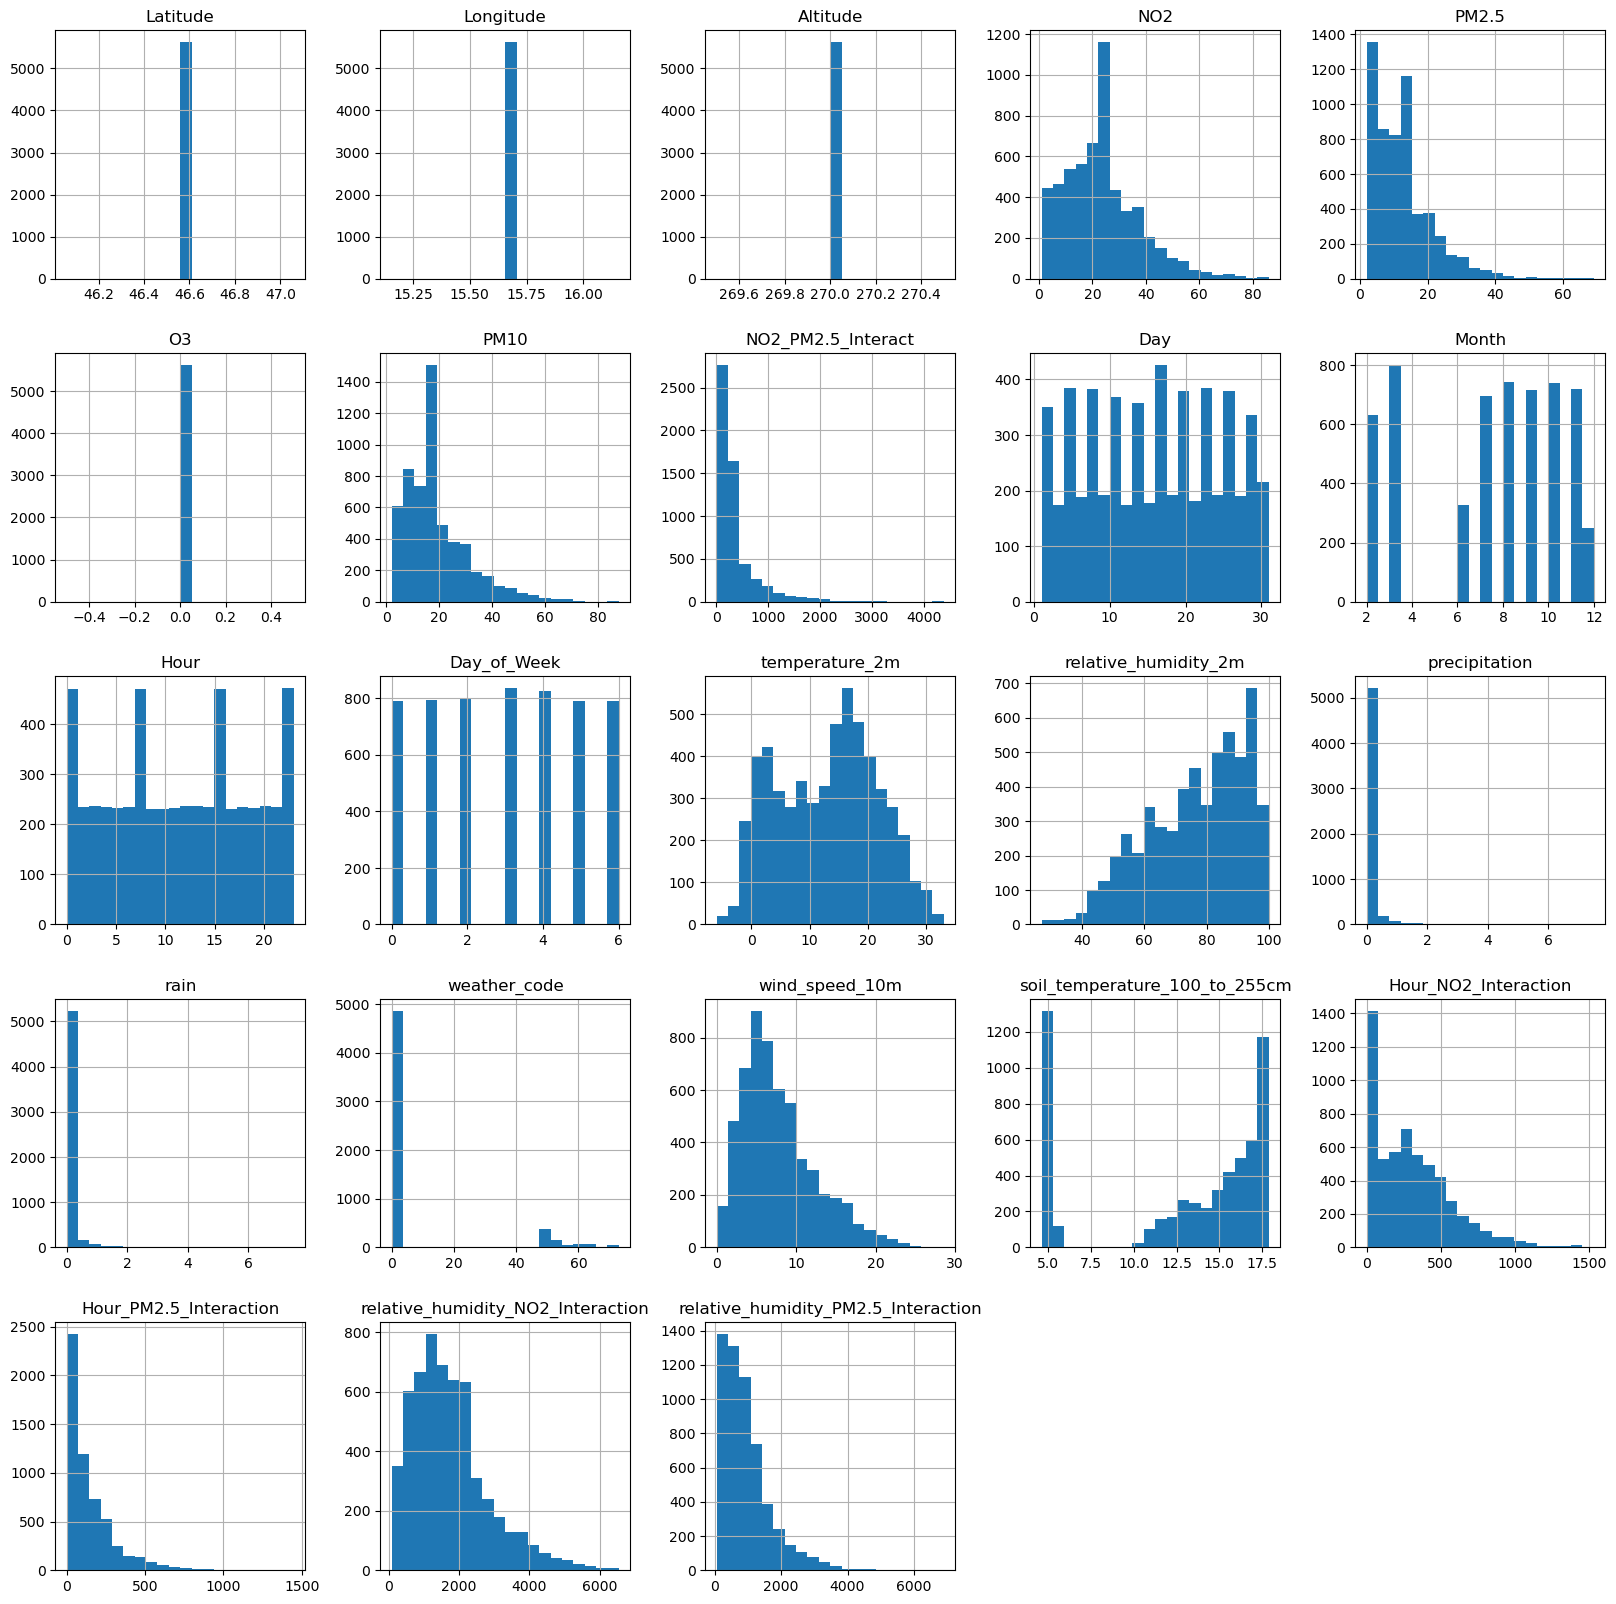

In [274]:
plot_histograms(all_data)

In [275]:
def printSkew():
  skewness_info = []
  for column in all_data.columns[1:]:
      skew = all_data[column].skew()
      skewness_info.append((column, skew))

  # Pretvori seznam v DataFrame za lažje prikazovanje
  skewness_df = pd.DataFrame(skewness_info, columns=['Column Name', 'Skewness'])

  # Izpišite oznako stolpca in njegovo poševnost
  print(skewness_df)

printSkew()

                            Column Name  Skewness
0                              Latitude  0.000000
1                             Longitude  0.000000
2                              Altitude  0.000000
3                                   NO2  0.923748
4                                 PM2.5  1.450276
5                                    O3  0.000000
6                                  PM10  1.350963
7                    NO2_PM2.5_Interact  2.838323
8                                   Day -0.002586
9                                 Month -0.460208
10                                 Hour -0.000892
11                          Day_of_Week -0.006288
12                       temperature_2m -0.036363
13                 relative_humidity_2m -0.549954
14                        precipitation  8.169427
15                                 rain  8.247523
16                         weather_code  2.185439
17                       wind_speed_10m  0.975047
18        soil_temperature_100_to_255cm -0.766262


In [276]:
left_skew_columns = ["relative_humidity_2m", "soil_temperature_100_to_255cm"]
for col in left_skew_columns:
    all_data[col] = np.square(all_data[col])

In [277]:
right_test = all_data.copy()

In [278]:
all_data = right_test.copy()

In [279]:
# Right skeewed data 

right_skew_columns = ["NO2", "PM2.5", "NO2_PM2.5_Interact", "Hour_NO2_Interaction", "Hour_PM2.5_Interaction", "precipitation", "rain", "wind_speed_10m", "relative_humidity_NO2_Interaction", "relative_humidity_PM2.5_Interaction"]
for col in right_skew_columns:
    all_data[col] = np.log(all_data[col]+1 )

                            Column Name  Skewness
0                              Latitude  0.000000
1                             Longitude  0.000000
2                              Altitude  0.000000
3                                   NO2 -0.761411
4                                 PM2.5 -0.159451
5                                    O3  0.000000
6                                  PM10  1.350963
7                    NO2_PM2.5_Interact -0.385236
8                                   Day -0.002586
9                                 Month -0.460208
10                                 Hour -0.000892
11                          Day_of_Week -0.006288
12                       temperature_2m -0.036363
13                 relative_humidity_2m -0.221648
14                        precipitation  4.932284
15                                 rain  5.040826
16                         weather_code  2.185439
17                       wind_speed_10m -0.341638
18        soil_temperature_100_to_255cm -0.503904


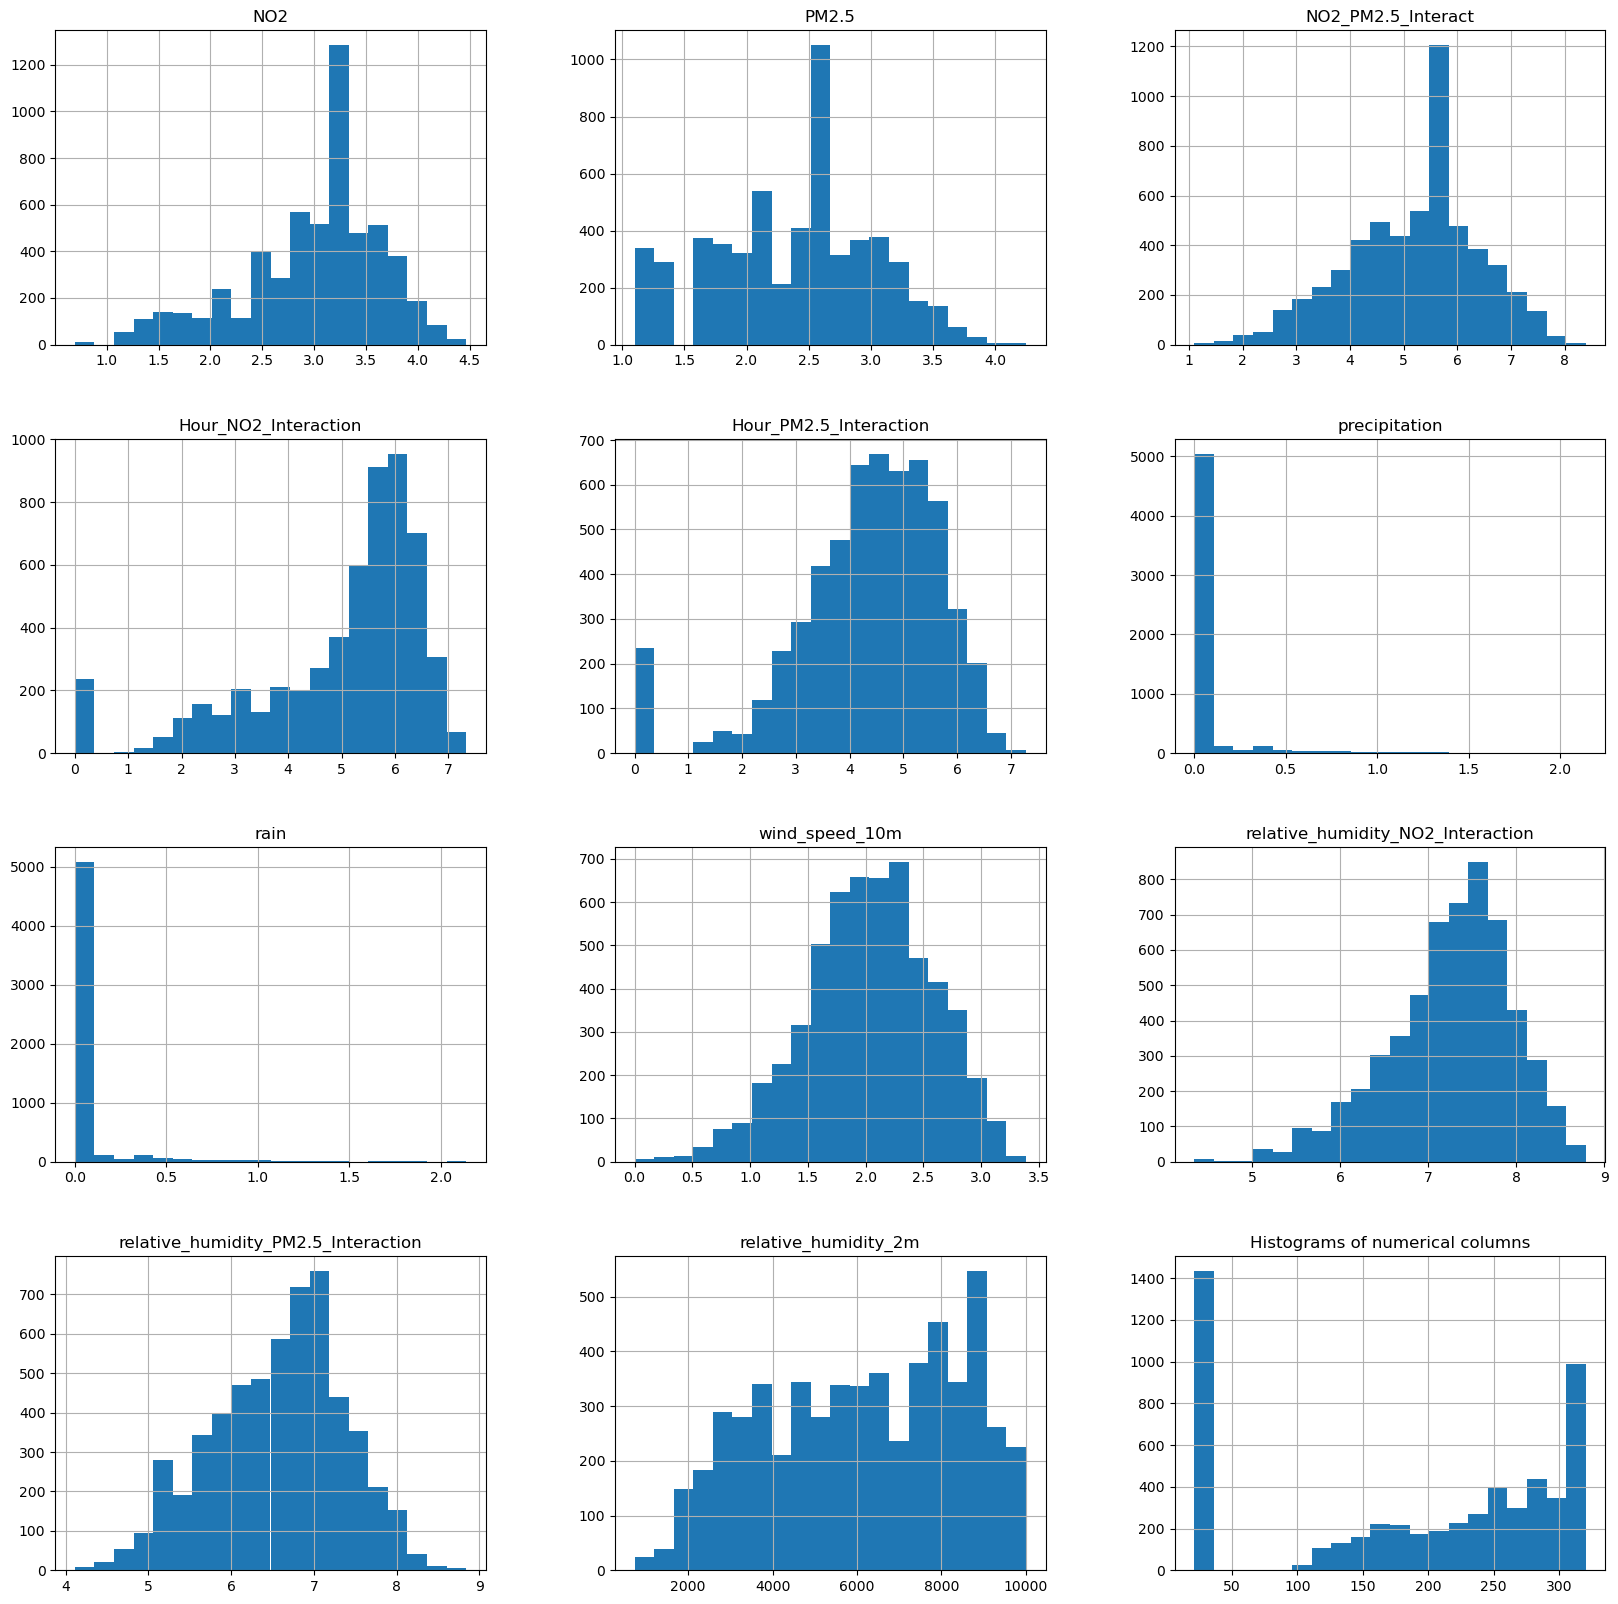

In [280]:
printSkew()
plot_histograms(all_data[["NO2", "PM2.5", "NO2_PM2.5_Interact", "Hour_NO2_Interaction", "Hour_PM2.5_Interaction", "precipitation", "rain", "wind_speed_10m", "relative_humidity_NO2_Interaction", "relative_humidity_PM2.5_Interaction","relative_humidity_2m", "soil_temperature_100_to_255cm"]])

# Information Gain

In [281]:
target = all_data['PM10']
target_feature = all_data.drop('Date', axis=1)

info_gains = mutual_info_regression(target_feature.drop('PM10', axis=1), target)

info_gain_df = pd.DataFrame({'Feature': target_feature.columns.drop('PM10'), 'Information_Gain': info_gains})
info_gain_df = info_gain_df.sort_values(by='Information_Gain', ascending=False)

print(info_gain_df)

threshold = 0.2
selected_features = info_gain_df[info_gain_df['Information_Gain'] >= threshold]['Feature']

print("Selected Features:")
print(selected_features)

                                Feature  Information_Gain
4                                 PM2.5          1.395974
6                    NO2_PM2.5_Interact          1.124296
21  relative_humidity_PM2.5_Interaction          1.077215
19               Hour_PM2.5_Interaction          0.817043
3                                   NO2          0.573987
20    relative_humidity_NO2_Interaction          0.524369
18                 Hour_NO2_Interaction          0.450679
17        soil_temperature_100_to_255cm          0.429531
11                       temperature_2m          0.230569
7                                   Day          0.194684
8                                 Month          0.187320
16                       wind_speed_10m          0.146153
12                 relative_humidity_2m          0.115290
15                         weather_code          0.083981
9                                  Hour          0.048118
14                                 rain          0.044334
10            

In [282]:
selected_features = selected_features.tolist()

In [315]:
selected_features

['PM2.5',
 'NO2_PM2.5_Interact',
 'relative_humidity_PM2.5_Interaction',
 'Hour_PM2.5_Interaction',
 'NO2',
 'relative_humidity_NO2_Interaction',
 'Hour_NO2_Interaction',
 'soil_temperature_100_to_255cm',
 'temperature_2m']

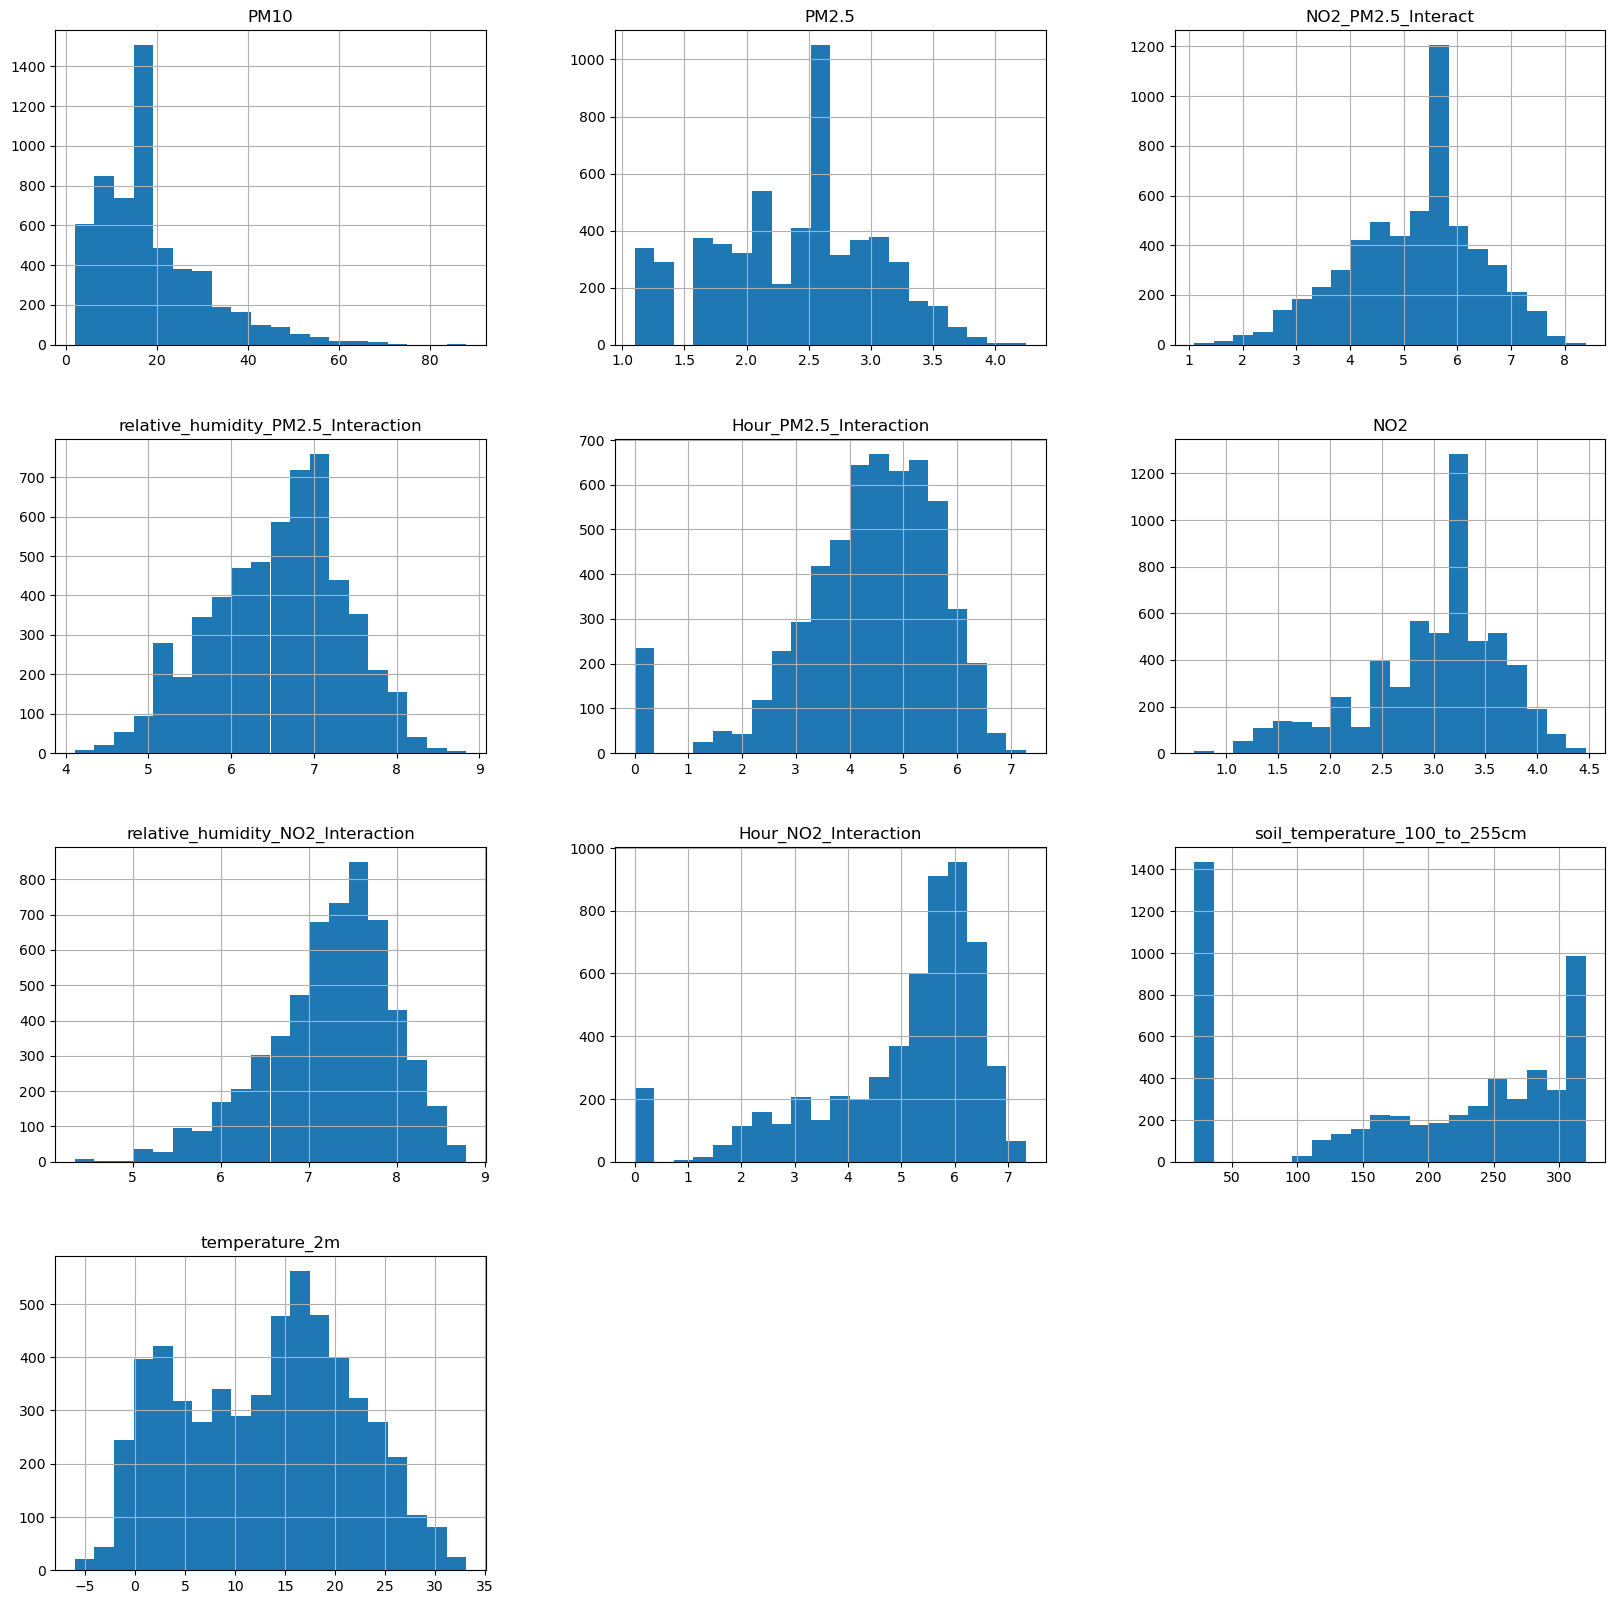

In [283]:
learn_features = all_data[ ['PM10']+ list(selected_features)]
plot_histograms(learn_features)
learn_features = learn_features.values



# Preparing Window

In [357]:
# spliting data into test and train
train_size = len(learn_features) - 576 - 48
train_data, test_data = learn_features[:train_size], learn_features[train_size:]

In [358]:
train_data.shape, test_data.shape

((5001, 10), (624, 10))

In [359]:
train_pm10 = np.array(train_data[:,0])
test_pm10 = np.array(test_data[:,0])
pm10_scaler = MinMaxScaler()
train_pm10_normalized = pm10_scaler.fit_transform(train_pm10.reshape(-1, 1))
test_pm10_normalized = pm10_scaler.transform(test_pm10.reshape(-1, 1))

train_final_pm10 = np.array(learn_features[:, 0])
train_final_pm10_normalized = pm10_scaler.fit_transform(train_final_pm10.reshape(-1, 1))

print(train_pm10_normalized)
print(test_pm10_normalized)

[[0.62790698]
 [0.62790698]
 [0.62790698]
 ...
 [0.12790698]
 [0.12790698]
 [0.08139535]]
[[0.09302326]
 [0.08139535]
 [0.06976744]
 [0.05813953]
 [0.06976744]
 [0.03488372]
 [0.04651163]
 [0.06976744]
 [0.08139535]
 [0.15116279]
 [0.20930233]
 [0.1744186 ]
 [0.13953488]
 [0.10465116]
 [0.10465116]
 [0.13953488]
 [0.06976744]
 [0.09302326]
 [0.19818812]
 [0.08139535]
 [0.10465116]
 [0.10465116]
 [0.09302326]
 [0.1627907 ]
 [0.15116279]
 [0.20930233]
 [0.25581395]
 [0.27906977]
 [0.10465116]
 [0.11627907]
 [0.12790698]
 [0.11627907]
 [0.11627907]
 [0.13953488]
 [0.1627907 ]
 [0.1627907 ]
 [0.1744186 ]
 [0.1744186 ]
 [0.15116279]
 [0.12790698]
 [0.15116279]
 [0.1627907 ]
 [0.15116279]
 [0.19818812]
 [0.13953488]
 [0.19767442]
 [0.15116279]
 [0.13953488]
 [0.19767442]
 [0.1627907 ]
 [0.09302326]
 [0.08139535]
 [0.04651163]
 [0.05813953]
 [0.06976744]
 [0.06976744]
 [0.06976744]
 [0.05813953]
 [0.10465116]
 [0.13953488]
 [0.24418605]
 [0.18604651]
 [0.20930233]
 [0.15116279]
 [0.11627907]


In [360]:
train_other = np.array(train_data[:,1:])
test_other = np.array(test_data[:,1:])
other_scaler = MinMaxScaler()
train_other_normalized = other_scaler.fit_transform(train_other)
test_other_normalized = other_scaler.transform(test_other)

train_final_other = np.array(learn_features[:, 1:])
train_final_other_normalized = other_scaler.fit_transform(train_final_other)

print(train_other_normalized)
print(test_other_normalized)
print(train_other_normalized.shape)

[[0.97194075 0.90591754 0.98777822 ... 0.92639652 0.03037594 0.10192837]
 [0.98625104 0.88951503 1.         ... 0.91142238 0.03037594 0.09090909]
 [0.98625104 0.88951503 1.         ... 0.91142238 0.03037594 0.09090909]
 ...
 [0.48597037 0.62582358 0.67235169 ... 0.68927182 0.75298246 0.21487603]
 [0.45546823 0.59603889 0.64315138 ... 0.69354555 0.75298246 0.25068871]
 [0.34383315 0.55315633 0.55059133 ... 0.7174145  0.75298246 0.33608815]]
[[0.34383315 0.58361268 0.53243466 ... 0.76368571 0.75298246 0.41873278]
 [0.24298519 0.50152084 0.42876645 ... 0.74191511 0.75298246 0.47658402]
 [0.17907172 0.49298021 0.29059513 ... 0.77663274 0.75298246 0.51239669]
 ...
 [0.51402963 0.64786054 0.67818801 ... 0.69931225 0.40250627 0.05785124]
 [0.42205691 0.63098444 0.61385615 ... 0.74250397 0.40250627 0.03581267]
 [0.38512241 0.63772307 0.5865175  ... 0.78332741 0.40250627 0.0661157 ]]
(5001, 9)


In [361]:
joblib.dump(pm10_scaler, 'pm10_scaler.joblib')
joblib.dump(other_scaler, 'other_scaler.joblib')

['other_scaler.joblib']

In [362]:
train_normalized = np.column_stack([train_pm10_normalized, train_other_normalized])
test_normalized = np.column_stack([test_pm10_normalized, test_other_normalized])

train_final_normalized = np.column_stack([train_final_pm10_normalized, train_final_other_normalized])

# Now train_normalized and test_normalized have the same shape as before
print("Shape of train_normalized:", train_normalized.shape)
print("Shape of test_normalized:", test_normalized.shape)

Shape of train_normalized: (5001, 10)
Shape of test_normalized: (624, 10)


In [363]:
def create_multivariate_dataset_with_steps(time_series, look_back=1, step=1):
    X, y = [], []
    for i in range(0, len(time_series) - look_back, step):
        X.append(time_series[i:(i + look_back), :])
        y.append(time_series[i + look_back, 0]) 
    return np.array(X), np.array(y)

look_back = 48
step = 1

X_train, y_train = create_multivariate_dataset_with_steps(train_normalized, look_back, step)
X_test, y_test = create_multivariate_dataset_with_steps(test_normalized, look_back, step)

X_final, y_final = create_multivariate_dataset_with_steps(train_final_normalized, look_back, step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])

X_final = X_final.reshape(X_final.shape[0], X_final.shape[2], X_final.shape[1])


print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test}")



X_train shape: (4953, 10, 48)
y_train shape: [0.56976744 0.47674419 0.47674419 ... 0.12790698 0.12790698 0.08139535]
X_test shape: (576, 10, 48)
y_test shape: [0.19767442 0.1627907  0.09302326 0.08139535 0.04651163 0.05813953
 0.06976744 0.06976744 0.06976744 0.05813953 0.10465116 0.13953488
 0.24418605 0.18604651 0.20930233 0.15116279 0.11627907 0.09302326
 0.09302326 0.19818812 0.06976744 0.10465116 0.13953488 0.18604651
 0.22093023 0.25581395 0.30232558 0.26744186 0.18604651 0.08139535
 0.09302326 0.15116279 0.20930233 0.36046512 0.36046512 0.46511628
 0.24418605 0.31395349 0.15116279 0.12790698 0.25581395 0.27906977
 0.20930233 0.23255814 0.19818812 0.15116279 0.18604651 0.25581395
 0.23255814 0.19767442 0.20930233 0.20930233 0.30232558 0.36046512
 0.34883721 0.37209302 0.39534884 0.47674419 0.52325581 0.65116279
 0.77906977 0.56976744 0.62790698 0.60465116 0.45348837 0.38372093
 0.11627907 0.23255814 0.19818812 0.1627907  0.23255814 0.30232558
 0.3255814  0.37209302 0.37209302 0.4

In [364]:
from tensorflow.keras.layers import LSTM, GRU, Dense, RNN, SimpleRNNCell

def build_rnn_model(input_shape):
    model = Sequential()
    model.add(RNN(SimpleRNNCell(32), return_sequences=True, input_shape=input_shape))
    model.add(RNN(SimpleRNNCell(32)))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    return model

def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=32, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=32))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    return model

def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=32, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=32))
    model.add(Dense(units=16, activation='relu'))
    model.add(Dense(units=1))
    return model

In [365]:
def train_and_plot_model(model, X_train, y_train, epochs=50):
    model.compile(optimizer='adam', loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=1)
    
    # Izris zgodovine učenja
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Learning History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [366]:
input_shape = (X_train.shape[1], X_train.shape[2])

Epoch 1/30
124/124 [==============================] - 4s 11ms/step - loss: 0.0147 - val_loss: 0.0105
Epoch 2/30
124/124 [==============================] - 1s 7ms/step - loss: 0.0057 - val_loss: 0.0075
Epoch 3/30
124/124 [==============================] - 1s 7ms/step - loss: 0.0051 - val_loss: 0.0068
Epoch 4/30
124/124 [==============================] - 1s 8ms/step - loss: 0.0041 - val_loss: 0.0060
Epoch 5/30
124/124 [==============================] - 1s 9ms/step - loss: 0.0039 - val_loss: 0.0060
Epoch 6/30
124/124 [==============================] - 1s 7ms/step - loss: 0.0038 - val_loss: 0.0052
Epoch 7/30
124/124 [==============================] - 1s 7ms/step - loss: 0.0035 - val_loss: 0.0051
Epoch 8/30
124/124 [==============================] - 1s 7ms/step - loss: 0.0036 - val_loss: 0.0049
Epoch 9/30
124/124 [==============================] - 1s 8ms/step - loss: 0.0033 - val_loss: 0.0046
Epoch 10/30
124/124 [==============================] - 1s 7ms/step - loss: 0.0033 - val_loss: 0.005

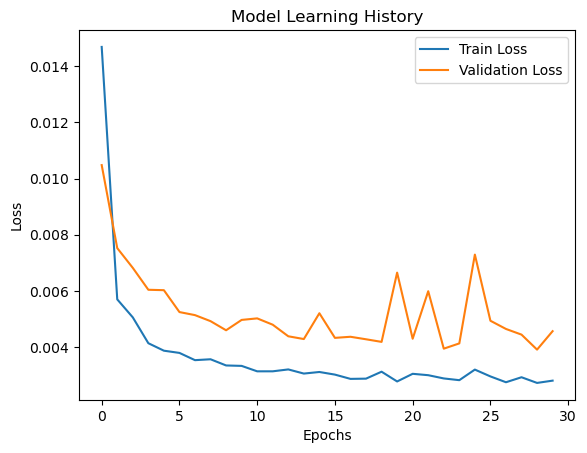

In [367]:
rnn_model_adv = build_rnn_model(input_shape)
train_and_plot_model(rnn_model_adv, X_train, y_train, epochs=30)

Epoch 1/30
124/124 [==============================] - 8s 23ms/step - loss: 0.0145 - val_loss: 0.0076
Epoch 2/30
124/124 [==============================] - 2s 17ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 3/30
124/124 [==============================] - 2s 14ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 4/30
124/124 [==============================] - 2s 14ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 5/30
124/124 [==============================] - 2s 14ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 6/30
124/124 [==============================] - 2s 15ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 7/30
124/124 [==============================] - 2s 14ms/step - loss: 0.0031 - val_loss: 0.0041
Epoch 8/30
124/124 [==============================] - 2s 13ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 9/30
124/124 [==============================] - 3s 21ms/step - loss: 0.0029 - val_loss: 0.0037
Epoch 10/30
124/124 [==============================] - 3s 21ms/step - loss: 0.0029 - val_lo

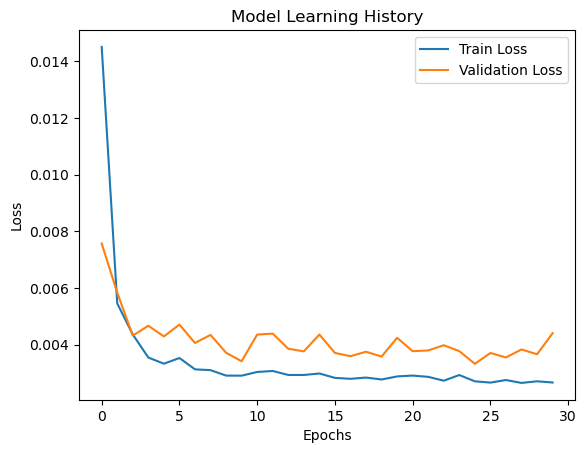

In [368]:
gru_model_adv = build_gru_model(input_shape)
train_and_plot_model(gru_model_adv, X_train, y_train, epochs=30)

Epoch 1/30
124/124 [==============================] - 8s 22ms/step - loss: 0.0117 - val_loss: 0.0086
Epoch 2/30
124/124 [==============================] - 2s 13ms/step - loss: 0.0070 - val_loss: 0.0073
Epoch 3/30
124/124 [==============================] - 2s 13ms/step - loss: 0.0048 - val_loss: 0.0048
Epoch 4/30
124/124 [==============================] - 2s 13ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 5/30
124/124 [==============================] - 2s 13ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 6/30
124/124 [==============================] - 2s 13ms/step - loss: 0.0034 - val_loss: 0.0067
Epoch 7/30
124/124 [==============================] - 2s 14ms/step - loss: 0.0033 - val_loss: 0.0040
Epoch 8/30
124/124 [==============================] - 2s 14ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 9/30
124/124 [==============================] - 2s 14ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 10/30
124/124 [==============================] - 2s 14ms/step - loss: 0.0029 - val_lo

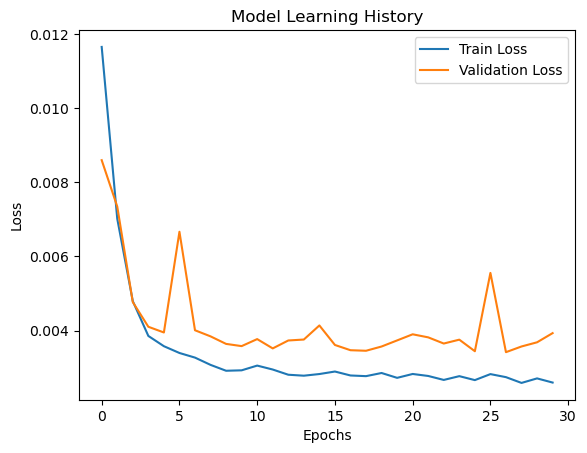

In [369]:
lstm_model_adv = build_lstm_model(input_shape)
train_and_plot_model(lstm_model_adv, X_train, y_train, epochs=30)

In [370]:
y_test_pred_rnn_adv = rnn_model_adv.predict(X_test)
y_test_pred_gru_adv = gru_model_adv.predict(X_test)
y_test_pred_lstm_adv = lstm_model_adv.predict(X_test)


18/18 [==============================] - 1s 5ms/step


In [371]:
print(y_test.shape)
y_test_true = pm10_scaler.inverse_transform(y_test.reshape(-1, 1))

print(y_test_true.shape)


y_test_pred_rnn_adv = pm10_scaler.inverse_transform(y_test_pred_rnn_adv)
y_test_pred_gru_adv = pm10_scaler.inverse_transform(y_test_pred_gru_adv)
y_test_pred_lstm_adv = pm10_scaler.inverse_transform(y_test_pred_lstm_adv)

(576,)
(576, 1)


In [372]:
def calculate_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    return mae, mse, evs

In [373]:
rnn_mae_adv, rnn_mse_adv, rnn_evs_adv = calculate_metrics(y_test_true, y_test_pred_rnn_adv)
gru_mae_adv, gru_mse_adv, gru_evs_adv = calculate_metrics(y_test_true, y_test_pred_gru_adv)
lstm_mae_adv, lstm_mse_adv, lstm_evs_adv = calculate_metrics(y_test_true, y_test_pred_lstm_adv)

print("RNN Model Metrics:")
print(f"MAE: {rnn_mae_adv}, MSE: {rnn_mse_adv}, EVS: {rnn_evs_adv}")

print("\nGRU Model Metrics:")
print(f"MAE: {gru_mae_adv}, MSE: {gru_mse_adv}, EVS: {gru_evs_adv}")

print("\nLSTM Model Metrics:")
print(f"MAE: {lstm_mae_adv}, MSE: {lstm_mse_adv}, EVS: {lstm_evs_adv}")

RNN Model Metrics:
MAE: 4.99202174350498, MSE: 49.855113157313696, EVS: 0.6807335782638559

GRU Model Metrics:
MAE: 4.937810486537935, MSE: 53.100840060555676, EVS: 0.7042151265712243

LSTM Model Metrics:
MAE: 5.056071362327425, MSE: 48.57308115124905, EVS: 0.708235736283872


(576,)


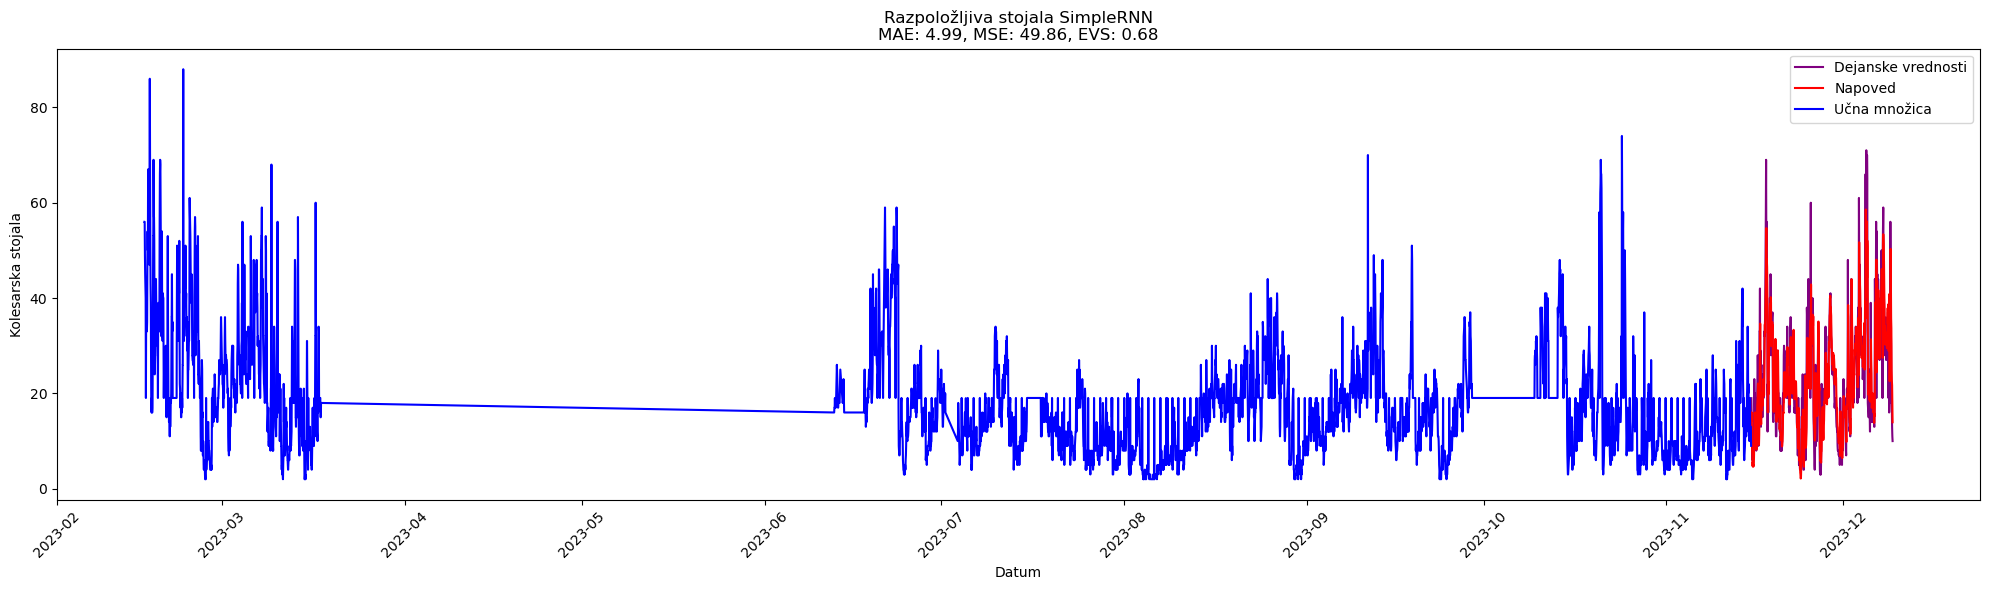

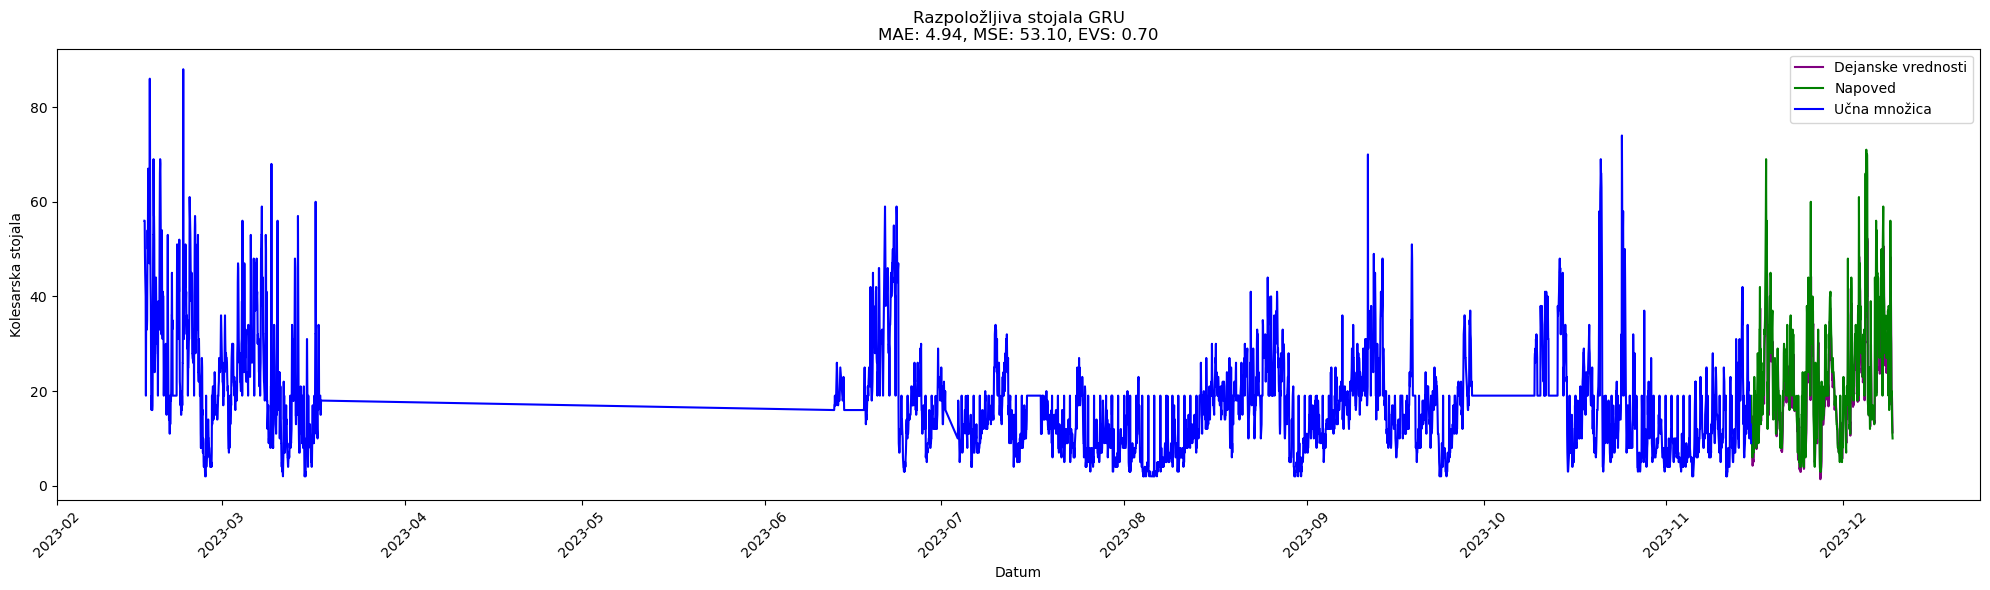

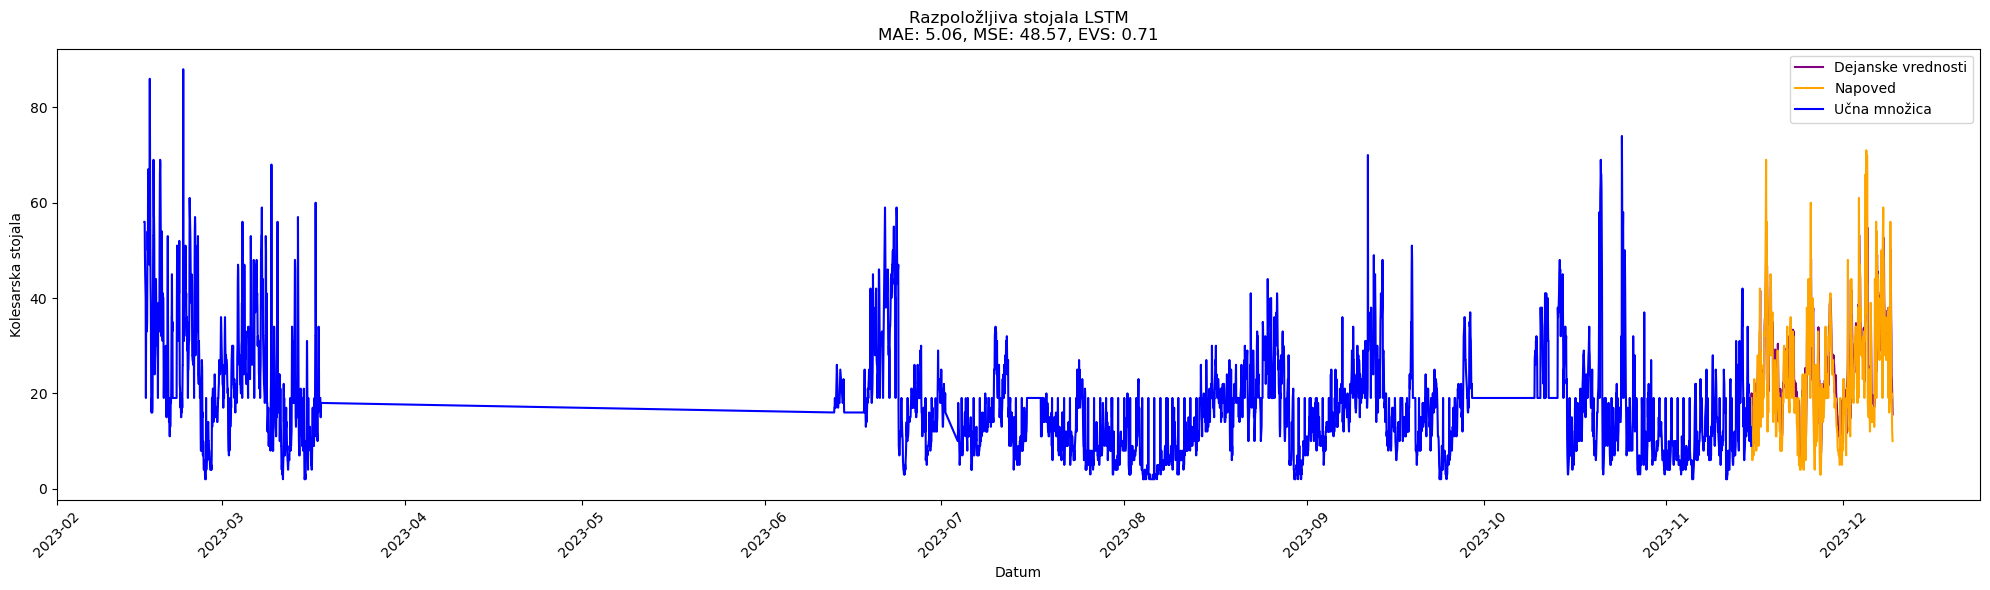

In [374]:
dates = all_data['Date'][:-look_back][-len(y_test):]
train_dates =  all_data['Date'][:len(train_data)]


print(dates.shape)
# Function to plot a comparison between actual values and predictions for a given model
def plot_comparison(train_dates, train_data, test_dates, y_pred_inverse, y_test_inverse, model_name, color1, color2, mae, mse, evs):
    plt.figure(figsize=(20, 6))
    plt.title(f'Razpoložljiva stojala {model_name}\nMAE: {mae:.2f}, MSE: {mse:.2f}, EVS: {evs:.2f}')
    plt.xlabel('Datum')
    plt.ylabel('Kolesarska stojala')
    plt.xticks(rotation=45)
    plt.plot(test_dates, y_test_inverse, color='purple', label='Dejanske vrednosti')
    plt.plot(test_dates, y_pred_inverse, color=color2, label=f'Napoved')
    plt.plot(train_dates, train_data, color=color1, label='Učna množica')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plotting RNN predictions
plot_comparison(
    train_dates,
    train_data[:,0],
    dates,
    y_test_pred_rnn_adv,
    y_test_true,

    'SimpleRNN',
    'blue',
    'red',
    rnn_mae_adv,
    rnn_mse_adv,
    rnn_evs_adv
)

# Plotting GRU predictions
plot_comparison(
    train_dates,
    train_data[:,0],
    dates,
    y_test_true,
    y_test_pred_gru_adv,
    'GRU',
    'blue',
    'green',
    gru_mae_adv,
    gru_mse_adv,
    gru_evs_adv
)

# Plotting LSTM predictions
plot_comparison(
    train_dates,
    train_data[:,0],
    dates,
    y_test_true,
    y_test_pred_lstm_adv,
    'LSTM',
    'blue',
    'orange',
    lstm_mae_adv,
    lstm_mse_adv,
    lstm_evs_adv
)

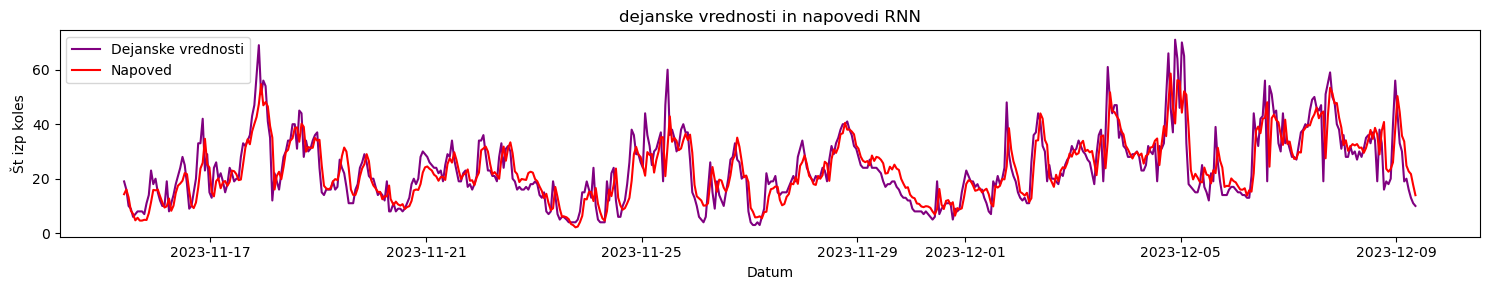

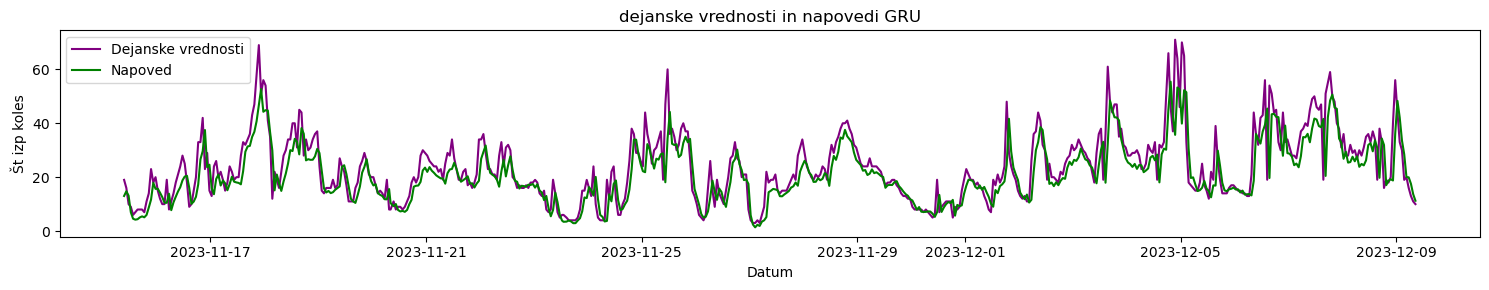

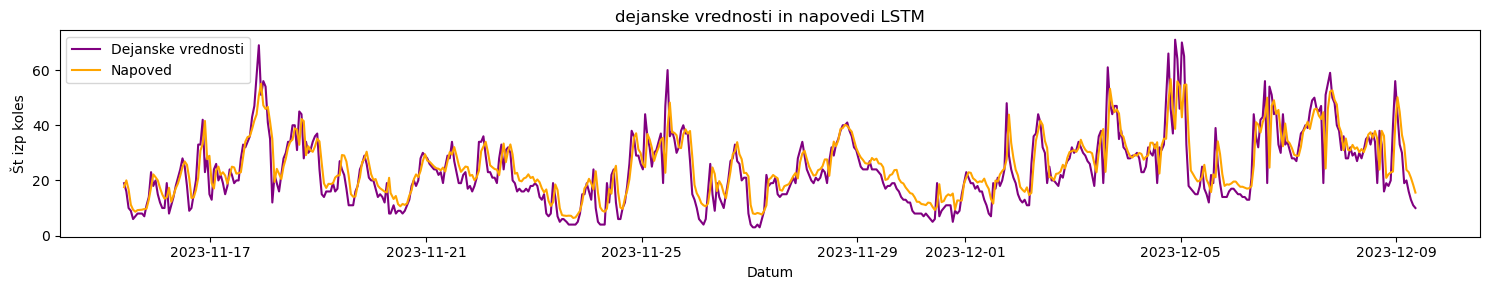

In [375]:
def plot_comparison(test_dates, y_test_inverse, y_pred_inverse, model_name, color):
    plt.figure(figsize=(15, 3))
    plt.plot(test_dates, y_test_inverse, color='purple', label='Dejanske vrednosti')
    plt.plot(test_dates, y_pred_inverse, color=color, label='Napoved')
    plt.title(f'dejanske vrednosti in napovedi {model_name}')
    plt.xlabel('Datum')
    plt.ylabel('Št izp koles')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_comparison(dates, y_test_true, y_test_pred_rnn_adv, 'RNN', 'red')

plot_comparison(dates, y_test_true, y_test_pred_gru_adv, 'GRU', 'green')

plot_comparison(dates, y_test_true, y_test_pred_lstm_adv, 'LSTM', 'orange')

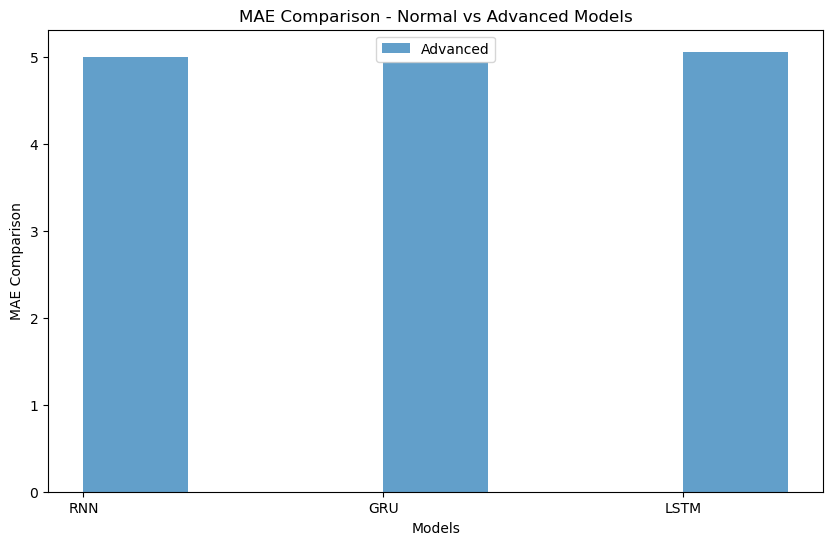

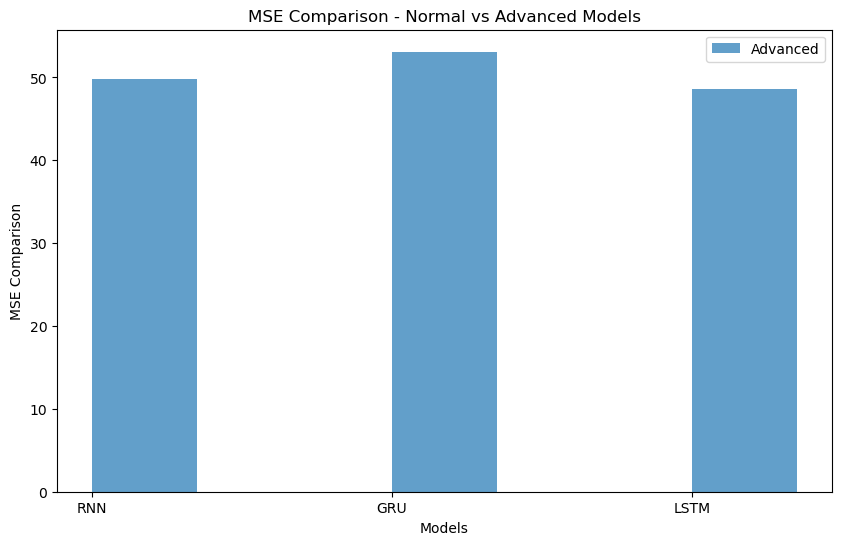

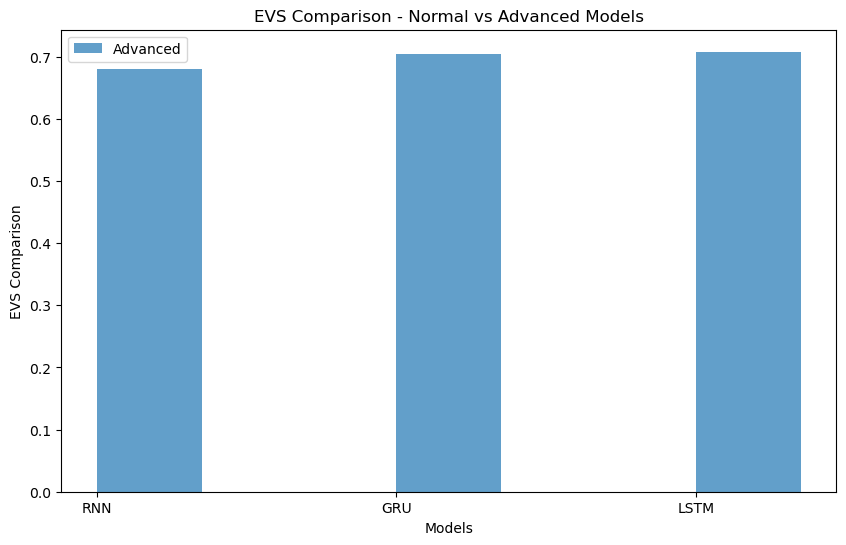

In [376]:

def plot_metric_comparison(adv_metrics, metric_name):
    models = ['RNN', 'GRU', 'LSTM']

    bar_width = 0.35

    index = np.arange(len(models))
    index_normal = index - bar_width/2
    index_adv = index + bar_width/2

    plt.figure(figsize=(10, 6))
    #plt.bar(index_normal, normal_metrics, width=bar_width, label='Normal', alpha=0.7)
    plt.bar(index_adv, adv_metrics, width=bar_width, label='Advanced', alpha=0.7)

    plt.xlabel('Models')
    plt.ylabel(f'{metric_name} Comparison')
    plt.title(f'{metric_name} Comparison - Normal vs Advanced Models')
    plt.xticks(index, models)
    plt.legend()

    plt.show()

plot_metric_comparison( [rnn_mae_adv, gru_mae_adv, lstm_mae_adv], 'MAE')

plot_metric_comparison( [rnn_mse_adv, gru_mse_adv, lstm_mse_adv], 'MSE')

plot_metric_comparison( [rnn_evs_adv, gru_evs_adv, lstm_evs_adv], 'EVS')

In [377]:
#shranjevanje modelov za nadaljne analize 
# Save RNN model
rnn_model_adv.save('rnn_model_adv.h5')

# Save GRU model
gru_model_adv.save('gru_model_adv.h5')

# Save LSTM model
lstm_model_adv.save('lstm_model_adv.h5')


In [434]:
# lstm je izmed modelov imel najbolsi mse in evs, zato ga bomo uporabili za izboljsavo modela 
from keras.layers import LSTM, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

def build_advanced_lstm_model(input_shape):
    model = Sequential()
    """ model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(LSTM(units=32))
    model.add(Dense(units=32, activation='relu'))

    model.add(Dense(units=16, activation='relu'))

    model.add(Dense(units=1)) """
    # LSTM layers
    """  model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=64, return_sequences=True))
    model.add(LSTM(units=32, return_sequences=True))
    model.add(LSTM(units=32, return_sequences=True ) )
    model.add(LSTM(units=32, return_sequences=True))
    model.add(LSTM(units=32))
    # Dense layers
    model.add(Dense(units=16, activation='relu')) """

    model.add(LSTM(units=92, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=48))
    model.add(Dropout(0.2))
    model.add(Dense(units=24, activation='relu'))
    


    # GRU layers
    """ model.add(GRU(units=96, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=96, return_sequences=True))
    model.add(GRU(units=48,return_sequences=True))
    model.add(GRU(units=48))
    model.add(Dense(units=24, activation='relu')) """
    


    #model.add(Dense(units=32, activation='relu'))
    
    # Output layer
    model.add(Dense(units=1))
    return model


def train_and_plot_adv_model(model, X_train, y_train, epochs=50, name='best_model.h5'):
    optimizer = Adam(lr=0.001)
    
    # Add ReduceLROnPlateau and ModelCheckpoint callbacks
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=0.0001, verbose=1)
    checkpoint = ModelCheckpoint(name, monitor='val_loss', save_best_only=True, verbose=1)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_split=0.2, callbacks=[checkpoint], verbose=1)
    
    # Plot training history
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Learning History')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


Epoch 1/40
60/62 [============================>.] - ETA: 0s - loss: 0.0281
Epoch 1: val_loss improved from inf to 0.01032, saving model to best_model.h5
62/62 [==============================] - 9s 49ms/step - loss: 0.0279 - val_loss: 0.0103
Epoch 2/40
60/62 [============================>.] - ETA: 0s - loss: 0.0124
Epoch 2: val_loss improved from 0.01032 to 0.00937, saving model to best_model.h5
62/62 [==============================] - 2s 27ms/step - loss: 0.0124 - val_loss: 0.0094
Epoch 3/40
62/62 [==============================] - ETA: 0s - loss: 0.0097
Epoch 3: val_loss improved from 0.00937 to 0.00670, saving model to best_model.h5
62/62 [==============================] - 2s 25ms/step - loss: 0.0097 - val_loss: 0.0067
Epoch 4/40
61/62 [============================>.] - ETA: 0s - loss: 0.0075
Epoch 4: val_loss improved from 0.00670 to 0.00585, saving model to best_model.h5
62/62 [==============================] - 2s 26ms/step - loss: 0.0075 - val_loss: 0.0058
Epoch 5/40
62/62 [======

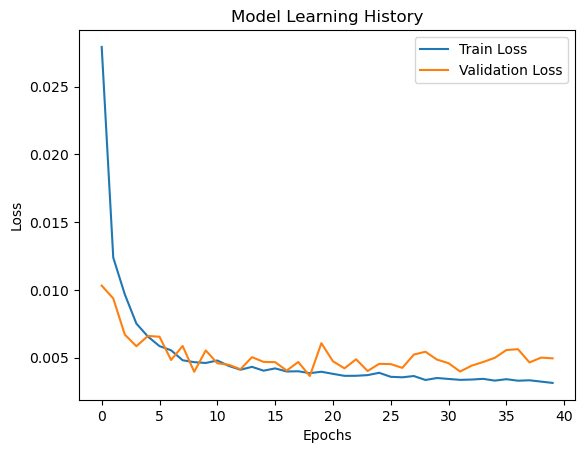

In [435]:
lstm_model = build_advanced_lstm_model(input_shape)
train_and_plot_adv_model(lstm_model, X_train, y_train, epochs=40)

In [439]:
from keras.models import load_model
lstm_model = load_model('best_model.h5')

In [440]:
y_test_pred_final = lstm_model.predict(X_test)


18/18 [==============================] - 2s 10ms/step


In [441]:
y_test_pred_final = pm10_scaler.inverse_transform(y_test_pred_final)

lstm_mae_final, lstm_mse_final, lstm_evs_final = calculate_metrics(y_test_true, y_test_pred_final)

In [442]:
lstm_mae_final, lstm_mse_final, lstm_evs_final

(4.9914117553652435, 51.77598244126535, 0.6773923764990732)

In [432]:
lstm_mae_final, lstm_mse_final, lstm_evs_final

(4.7233045257284685, 47.502056964816276, 0.6968149719810298)

In [398]:
def plot_metric_final_comparison(adv_metrics, metric_name):
    models = ['RNN', 'GRU', 'LSTM', 'GRU-Final']

    bar_width = 0.35

    index = np.arange(len(models))
    index_normal = index - bar_width/2
    index_adv = index + bar_width/2

    plt.figure(figsize=(10, 6))
    #plt.bar(index_normal, normal_metrics, width=bar_width, label='Normal', alpha=0.7)
    plt.bar(index_adv, adv_metrics, width=bar_width, label='Advanced', alpha=0.7)

    plt.xlabel('Models')
    plt.ylabel(f'{metric_name} Comparison')
    plt.title(f'{metric_name} Comparison - Normal vs Advanced Models')
    plt.xticks(index, models)
    plt.legend()

    plt.show()

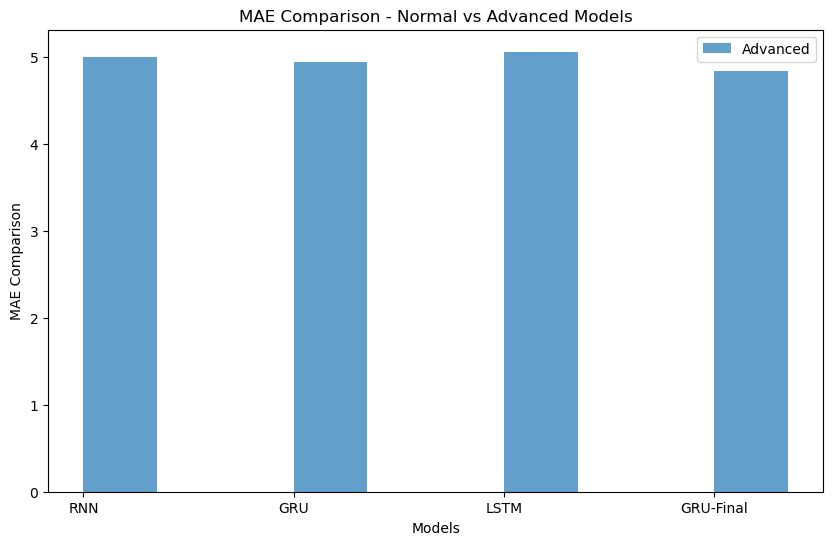

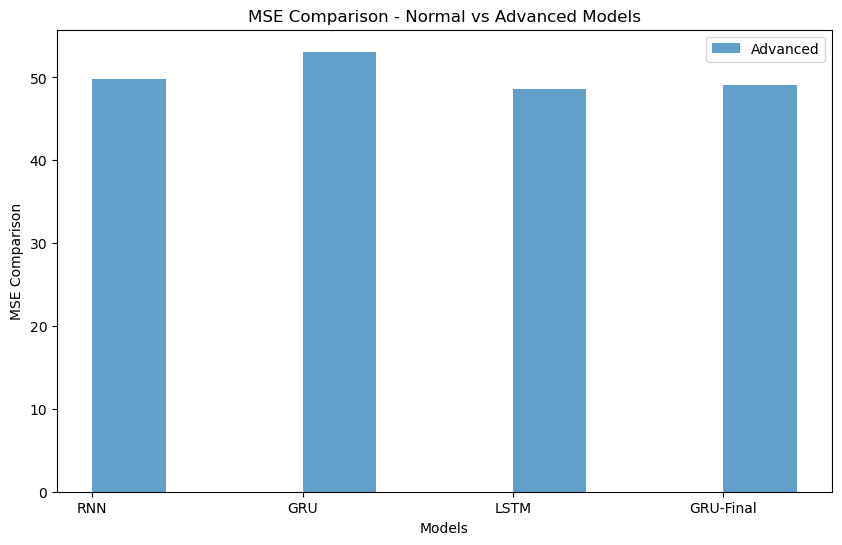

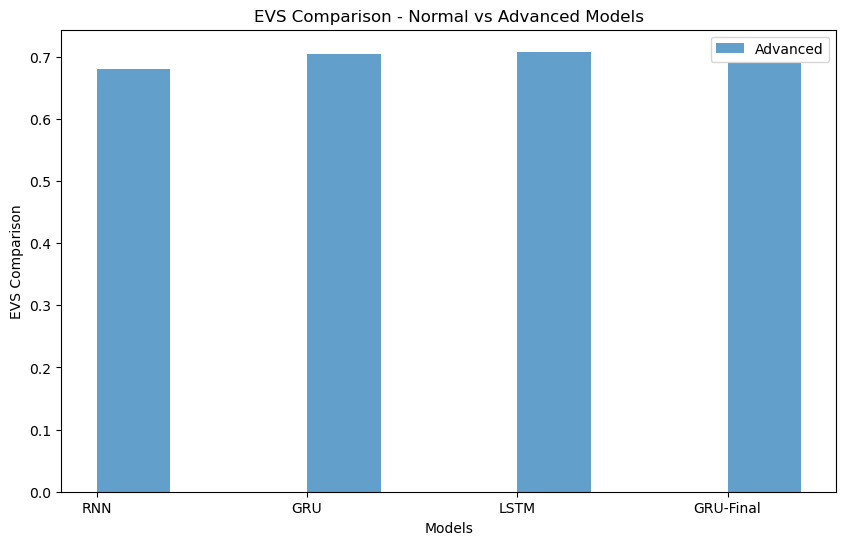

In [399]:
plot_metric_final_comparison( [rnn_mae_adv, gru_mae_adv, lstm_mae_adv, lstm_mae_final], 'MAE')

plot_metric_final_comparison( [rnn_mse_adv, gru_mse_adv, lstm_mse_adv, lstm_mse_final], 'MSE')

plot_metric_final_comparison( [rnn_evs_adv, gru_evs_adv, lstm_evs_adv, lstm_evs_final], 'EVS')

In [316]:
(X_final.shape[1], X_final.shape[2])

(10, 48)

(5577, 10, 48)
Epoch 1/40


c:\Users\trdin\anaconda3\envs\tensor2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


68/70 [============================>.] - ETA: 0s - loss: 0.0238
Epoch 1: val_loss improved from inf to 0.01695, saving model to best_model_final.h5
70/70 [==============================] - 9s 40ms/step - loss: 0.0236 - val_loss: 0.0170
Epoch 2/40
69/70 [============================>.] - ETA: 0s - loss: 0.0145
Epoch 2: val_loss did not improve from 0.01695
70/70 [==============================] - 2s 23ms/step - loss: 0.0145 - val_loss: 0.0177
Epoch 3/40
67/70 [===========================>..] - ETA: 0s - loss: 0.0128
Epoch 3: val_loss improved from 0.01695 to 0.01274, saving model to best_model_final.h5
70/70 [==============================] - 1s 21ms/step - loss: 0.0129 - val_loss: 0.0127
Epoch 4/40
68/70 [============================>.] - ETA: 0s - loss: 0.0123
Epoch 4: val_loss did not improve from 0.01274
70/70 [==============================] - 1s 20ms/step - loss: 0.0122 - val_loss: 0.0139
Epoch 5/40
69/70 [============================>.] - ETA: 0s - loss: 0.0102
Epoch 5: val_loss 

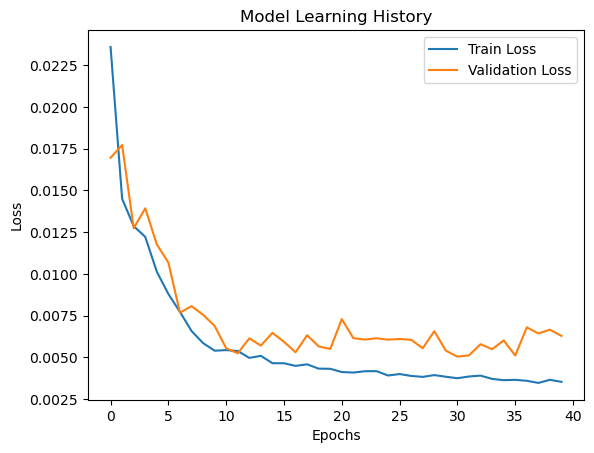

In [433]:
input_shape = (X_final.shape[1], X_final.shape[2])
print(X_final.shape)
lstm_model_final = build_advanced_lstm_model(input_shape)
train_and_plot_adv_model(lstm_model_final, X_final, y_final, epochs=40, name='best_model_final.h5')